<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

In [1]:
import io
import requests
import ssl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**1. Загрузить датасет**

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**контекст**
Важно, чтобы компании, выпускающие кредитные карты, могли распознавать мошеннические операции с кредитными картами, чтобы клиенты не платили за товары, которые они не покупали.

**содержание**
Наборы данных содержат транзакции, совершенные с помощью кредитных карт в сентябре 2013 года европейскими держателями карт.
В этом наборе данных представлены транзакции, которые произошли за два дня, и у нас 492 мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, на положительный класс (мошенничество) приходится 0,172% всех транзакций.

Набор данных содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем конфиденциальности мы не можем предоставить оригинальные функции и дополнительную справочную информацию о данных. 

- **V1, V2,… V28** являются основными компонентами, полученными с помощью PCA, единственными функциями, которые не были преобразованы с помощью PCA, являются «Время» и «Сумма».
- **Time** «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. 
- **Amount** «Сумма» - это сумма транзакции, эта функция может использоваться для обучения, зависящего от стоимости. 
- **Class** «Класс» - это переменная ответа, которая принимает **значение 1 в случае мошенничества и 0 в противном случае(честная сделка)**.

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

31 столбец

284 807 строк, пустых значений нет

In [4]:
dataset.loc[pd.isnull(dataset.Time)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [69]:
df_cl = dataset.pivot_table(columns=['Class'], values=['Time'], aggfunc='count').reset_index()
df_cl = df_cl.iloc[:,[1,2]]
df_cl

Class,0,1
0,284315,492


- 284 315 - честных сделок
- 492 - мошенических сделок

из 284 807 сделок

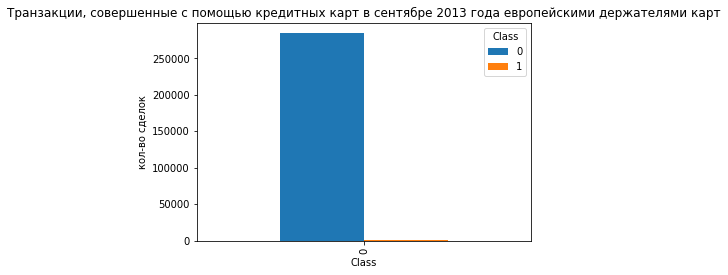

In [71]:
#визуализация
df_cl.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('кол-во сделок')
plt.title('Транзакции, совершенные с помощью кредитных карт в сентябре 2013 года европейскими держателями карт')
plt.show()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?**

In [74]:
df_amount = dataset.pivot_table(index=['Class'], values=['Amount'], aggfunc='sum')
df_amount

,Amount
Class,
0,2.510246e+07
1,6.012797e+04


Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

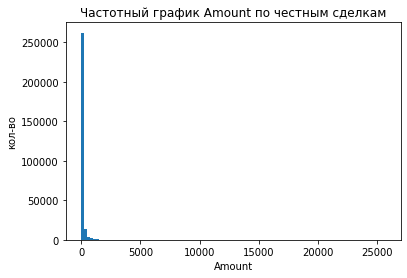

In [4]:
plt.hist(dataset[ dataset['Class']==0 ]['Amount'],100)
plt.xlabel('Amount')
plt.ylabel('кол-во')
plt.title('Частотный график Amount по честным сделкам')
plt.show()

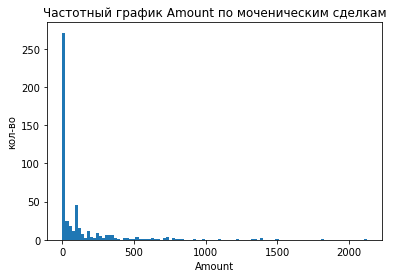

In [5]:
plt.hist(dataset[ dataset['Class']==1 ]['Amount'],100)
plt.xlabel('Amount')
plt.ylabel('кол-во')
plt.title('Частотный график Amount по моченическим сделкам')
plt.show()

**5. Построить графики histograms для всех значений**

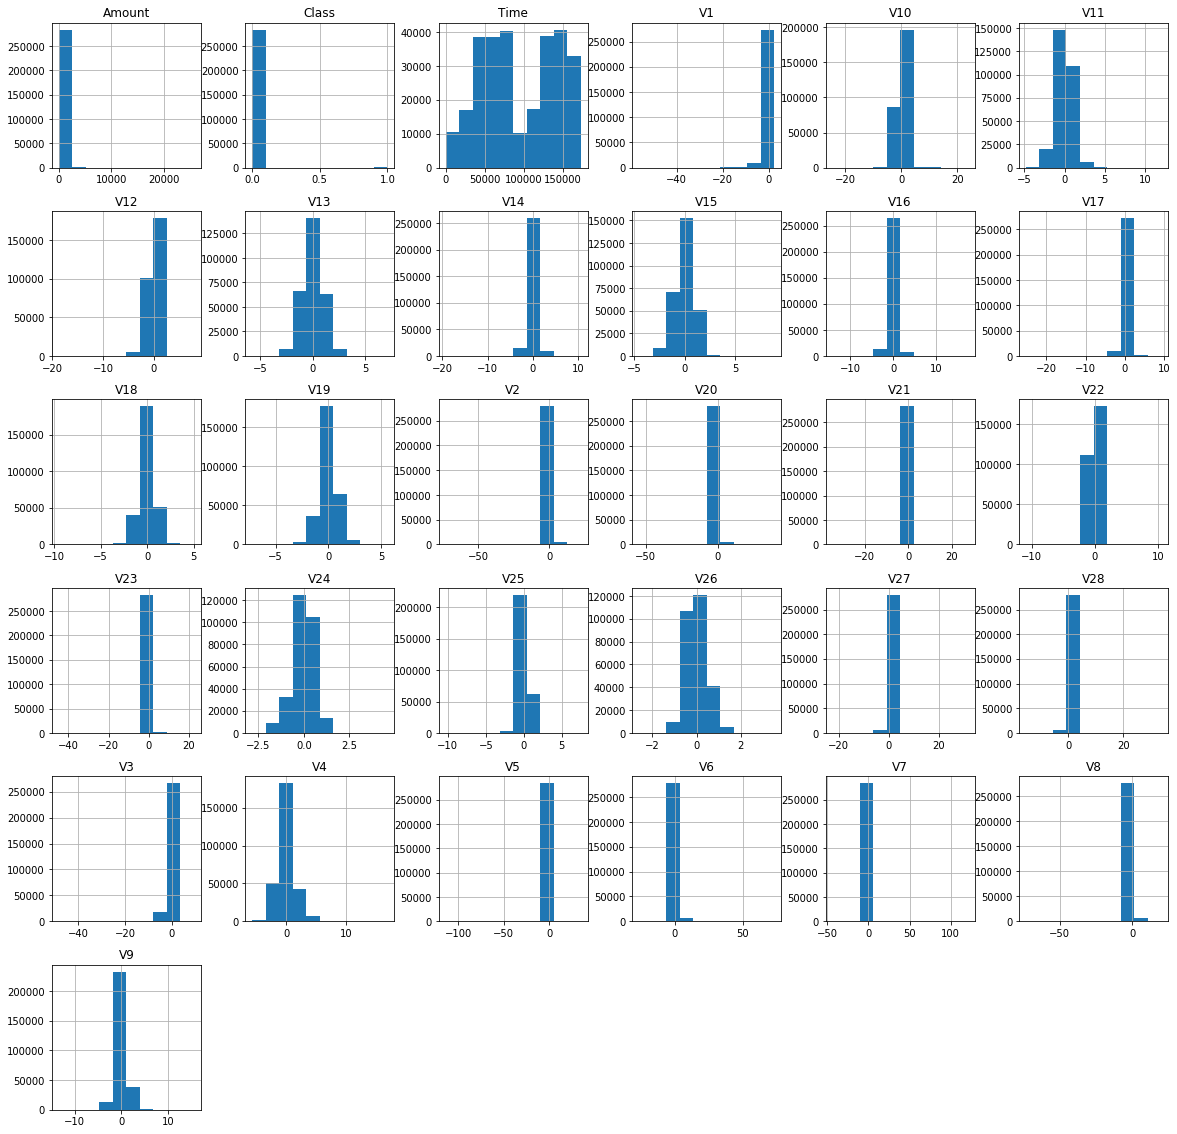

In [48]:
dataset.hist(figsize=(20,20))
plt.show()

Из данных графиков можно увидеть, что Class является дискретными величинами со значениями [0, 1] (распределение Бернулли).

По отдельным графикам ниже, можно сказать, что такие распределения, как V2, V3, V5, V7, V9, V10, V13-V21, V23, V28 являются распределением, близким к нормальному распределению Гаусса.

In [13]:
#выделим колонки в отдельный список
headers = list(dataset.columns.values)
headers

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [53]:
for X in headers:
    #тест на нормальное распределение Гаусса
    k2, p = stats.normaltest(dataset[X])
    alpha = 0.05
    print("p = {:g}".format(p))

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f'{X} Не нормальное распределение для alpha = {alpha}')
    else:
        print(f'{X} Нормальное распределение для alpha = {alpha}')

p = 0
Time Не нормальное распределение для alpha = 0.05
p = 0
V1 Не нормальное распределение для alpha = 0.05
p = 0
V2 Не нормальное распределение для alpha = 0.05
p = 0
V3 Не нормальное распределение для alpha = 0.05
p = 0
V4 Не нормальное распределение для alpha = 0.05
p = 0
V5 Не нормальное распределение для alpha = 0.05
p = 0
V6 Не нормальное распределение для alpha = 0.05
p = 0
V7 Не нормальное распределение для alpha = 0.05
p = 0
V8 Не нормальное распределение для alpha = 0.05
p = 0
V9 Не нормальное распределение для alpha = 0.05
p = 0
V10 Не нормальное распределение для alpha = 0.05
p = 0
V11 Не нормальное распределение для alpha = 0.05
p = 0
V12 Не нормальное распределение для alpha = 0.05
p = 2.41997e-126
V13 Не нормальное распределение для alpha = 0.05
p = 0
V14 Не нормальное распределение для alpha = 0.05
p = 0
V15 Не нормальное распределение для alpha = 0.05
p = 0
V16 Не нормальное распределение для alpha = 0.05
p = 0
V17 Не нормальное распределение для alpha = 0.05
p = 0
V

тест ни одно распределение не отнес к нормальному

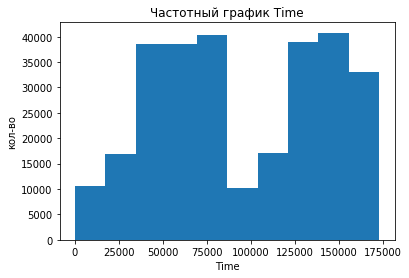

In [84]:
plt.hist(dataset['Time'])
plt.xlabel('Time')
plt.ylabel('кол-во')
plt.title('Частотный график Time')
plt.show()

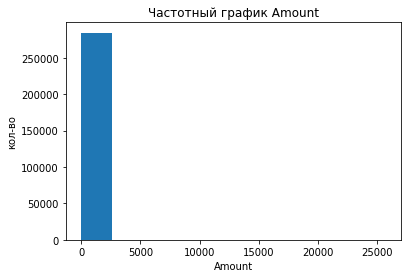

In [83]:
plt.hist(dataset['Amount'])
plt.xlabel('Amount')
plt.ylabel('кол-во')
plt.title('Частотный график Amount')
plt.show()

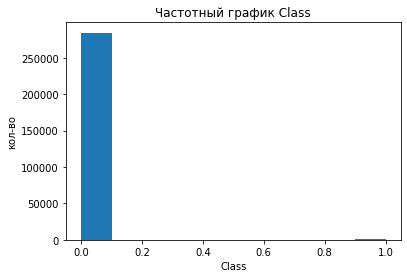

In [82]:
plt.hist(dataset['Class'])
plt.xlabel('Class')
plt.ylabel('кол-во')
plt.title('Частотный график Class')
plt.show()

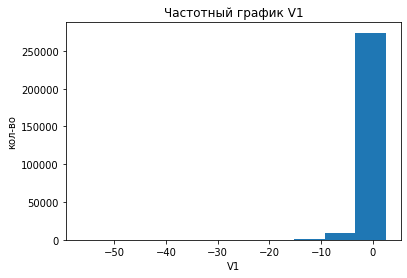

In [81]:
plt.hist(dataset['V1'])
plt.xlabel('V1')
plt.ylabel('кол-во')
plt.title('Частотный график V1')
plt.show()

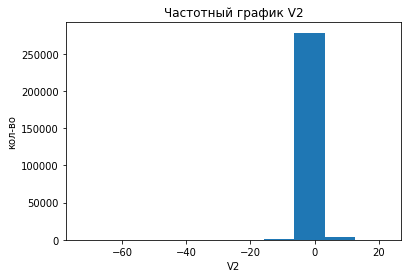

In [80]:
plt.hist(dataset['V2'])
plt.xlabel('V2')
plt.ylabel('кол-во')
plt.title('Частотный график V2')
plt.show()

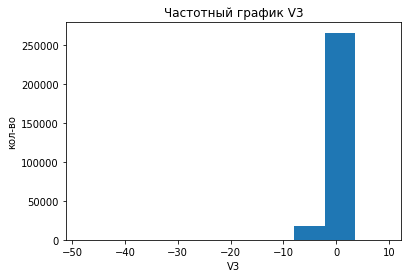

In [79]:
plt.hist(dataset['V3'])
plt.xlabel('V3')
plt.ylabel('кол-во')
plt.title('Частотный график V3')
plt.show()

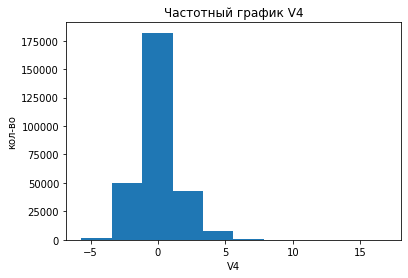

In [78]:
plt.hist(dataset['V4'])
plt.xlabel('V4')
plt.ylabel('кол-во')
plt.title('Частотный график V4')
plt.show()

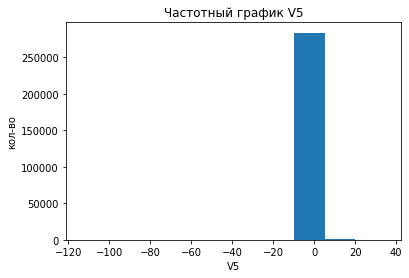

In [77]:
plt.hist(dataset['V5'])
plt.xlabel('V5')
plt.ylabel('кол-во')
plt.title('Частотный график V5')
plt.show()

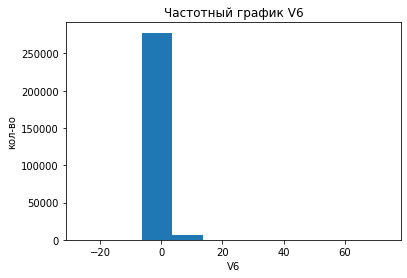

In [76]:
plt.hist(dataset['V6'])
plt.xlabel('V6')
plt.ylabel('кол-во')
plt.title('Частотный график V6')
plt.show()

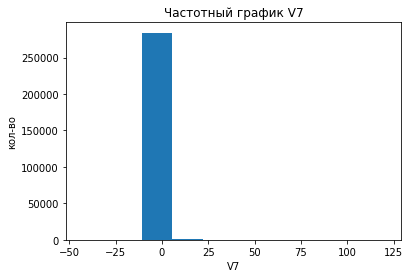

In [75]:
plt.hist(dataset['V7'])
plt.xlabel('V7')
plt.ylabel('кол-во')
plt.title('Частотный график V7')
plt.show()

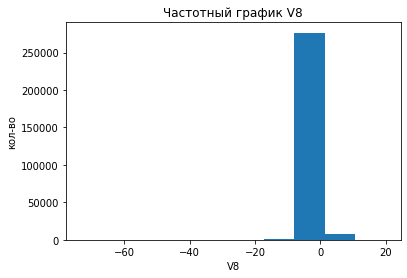

In [74]:
plt.hist(dataset['V8'])
plt.xlabel('V8')
plt.ylabel('кол-во')
plt.title('Частотный график V8')
plt.show()

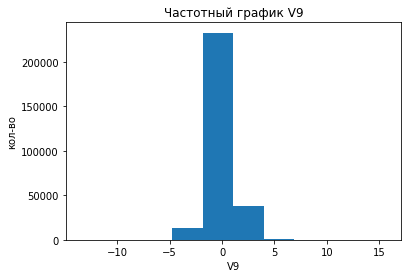

In [73]:
plt.hist(dataset['V9'])
plt.xlabel('V9')
plt.ylabel('кол-во')
plt.title('Частотный график V9')
plt.show()

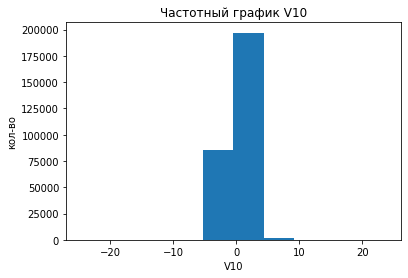

In [72]:
plt.hist(dataset['V10'])
plt.xlabel('V10')
plt.ylabel('кол-во')
plt.title('Частотный график V10')
plt.show()

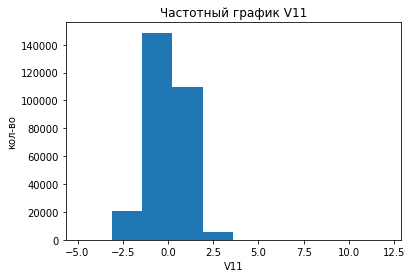

In [71]:
plt.hist(dataset['V11'])
plt.xlabel('V11')
plt.ylabel('кол-во')
plt.title('Частотный график V11')
plt.show()

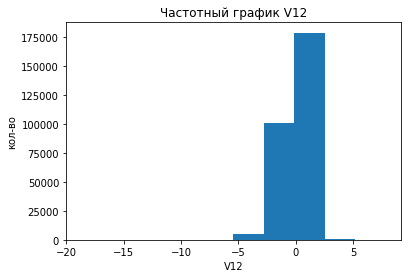

In [70]:
plt.hist(dataset['V12'])
plt.xlabel('V12')
plt.ylabel('кол-во')
plt.title('Частотный график V12')
plt.show()

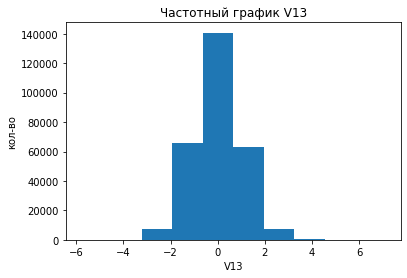

In [69]:
plt.hist(dataset['V13'])
plt.xlabel('V13')
plt.ylabel('кол-во')
plt.title('Частотный график V13')
plt.show()

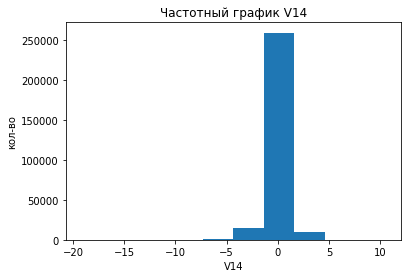

In [68]:
plt.hist(dataset['V14'])
plt.xlabel('V14')
plt.ylabel('кол-во')
plt.title('Частотный график V14')
plt.show()

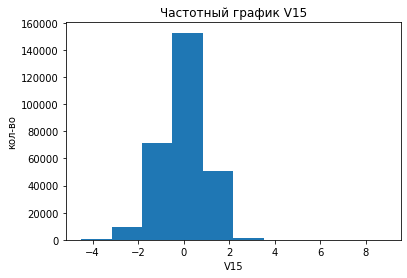

In [67]:
plt.hist(dataset['V15'])
plt.xlabel('V15')
plt.ylabel('кол-во')
plt.title('Частотный график V15')
plt.show()

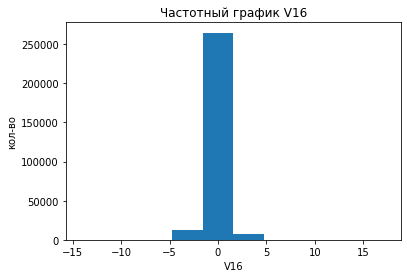

In [66]:
plt.hist(dataset['V16'])
plt.xlabel('V16')
plt.ylabel('кол-во')
plt.title('Частотный график V16')
plt.show()

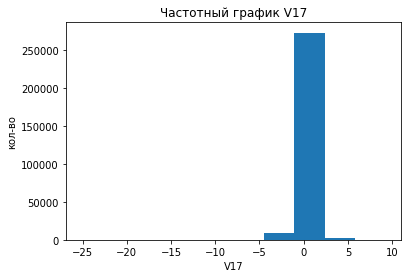

In [65]:
plt.hist(dataset['V17'])
plt.xlabel('V17')
plt.ylabel('кол-во')
plt.title('Частотный график V17')
plt.show()

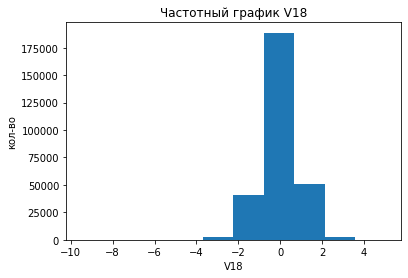

In [64]:
plt.hist(dataset['V18'])
plt.xlabel('V18')
plt.ylabel('кол-во')
plt.title('Частотный график V18')
plt.show()

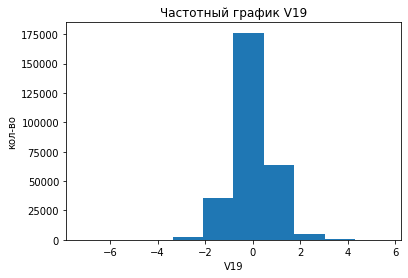

In [63]:
plt.hist(dataset['V19'])
plt.xlabel('V19')
plt.ylabel('кол-во')
plt.title('Частотный график V19')
plt.show()

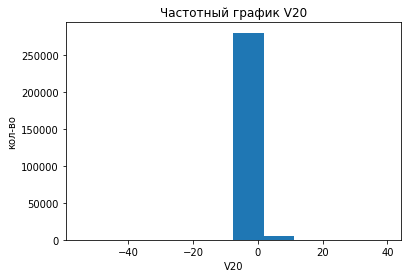

In [62]:
plt.hist(dataset['V20'])
plt.xlabel('V20')
plt.ylabel('кол-во')
plt.title('Частотный график V20')
plt.show()

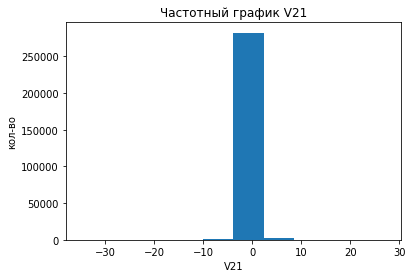

In [61]:
plt.hist(dataset['V21'])
plt.xlabel('V21')
plt.ylabel('кол-во')
plt.title('Частотный график V21')
plt.show()

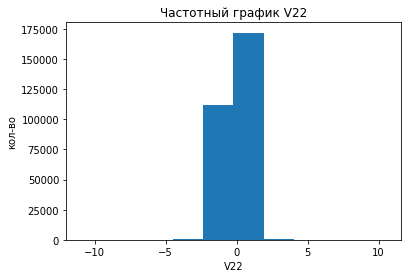

In [60]:
plt.hist(dataset['V22'])
plt.xlabel('V22')
plt.ylabel('кол-во')
plt.title('Частотный график V22')
plt.show()

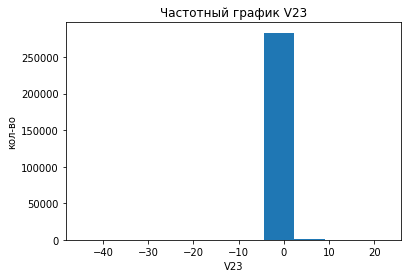

In [59]:
plt.hist(dataset['V23'])
plt.xlabel('V23')
plt.ylabel('кол-во')
plt.title('Частотный график V23')
plt.show()

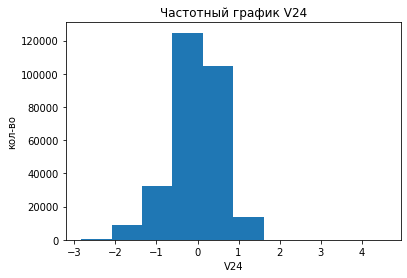

In [58]:
plt.hist(dataset['V24'])
plt.xlabel('V24')
plt.ylabel('кол-во')
plt.title('Частотный график V24')
plt.show()

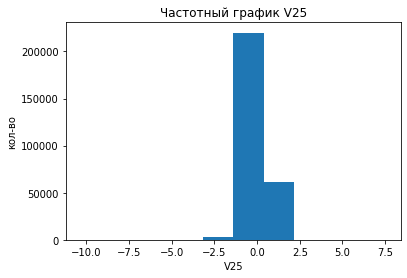

In [57]:
plt.hist(dataset['V25'])
plt.xlabel('V25')
plt.ylabel('кол-во')
plt.title('Частотный график V25')
plt.show()

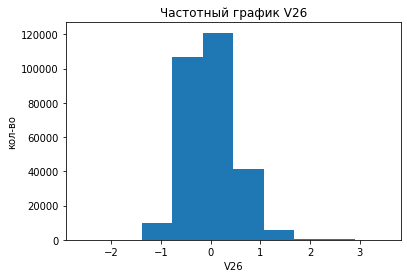

In [56]:
plt.hist(dataset['V26'])
plt.xlabel('V26')
plt.ylabel('кол-во')
plt.title('Частотный график V26')
plt.show()

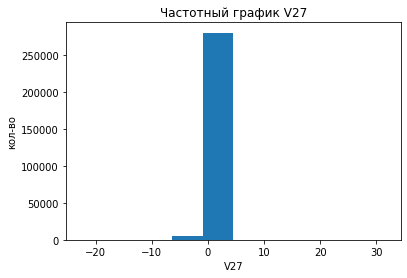

In [55]:
plt.hist(dataset['V27'])
plt.xlabel('V27')
plt.ylabel('кол-во')
plt.title('Частотный график V27')
plt.show()

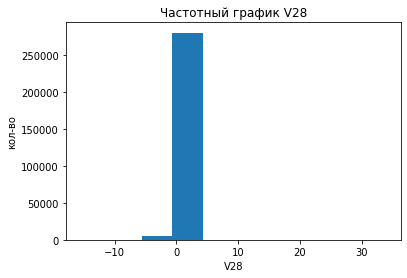

In [54]:
plt.hist(dataset['V28'])
plt.xlabel('V28')
plt.ylabel('кол-во')
plt.title('Частотный график V28')
plt.show()

**6. Построить матрицу корреляций для всех значений**

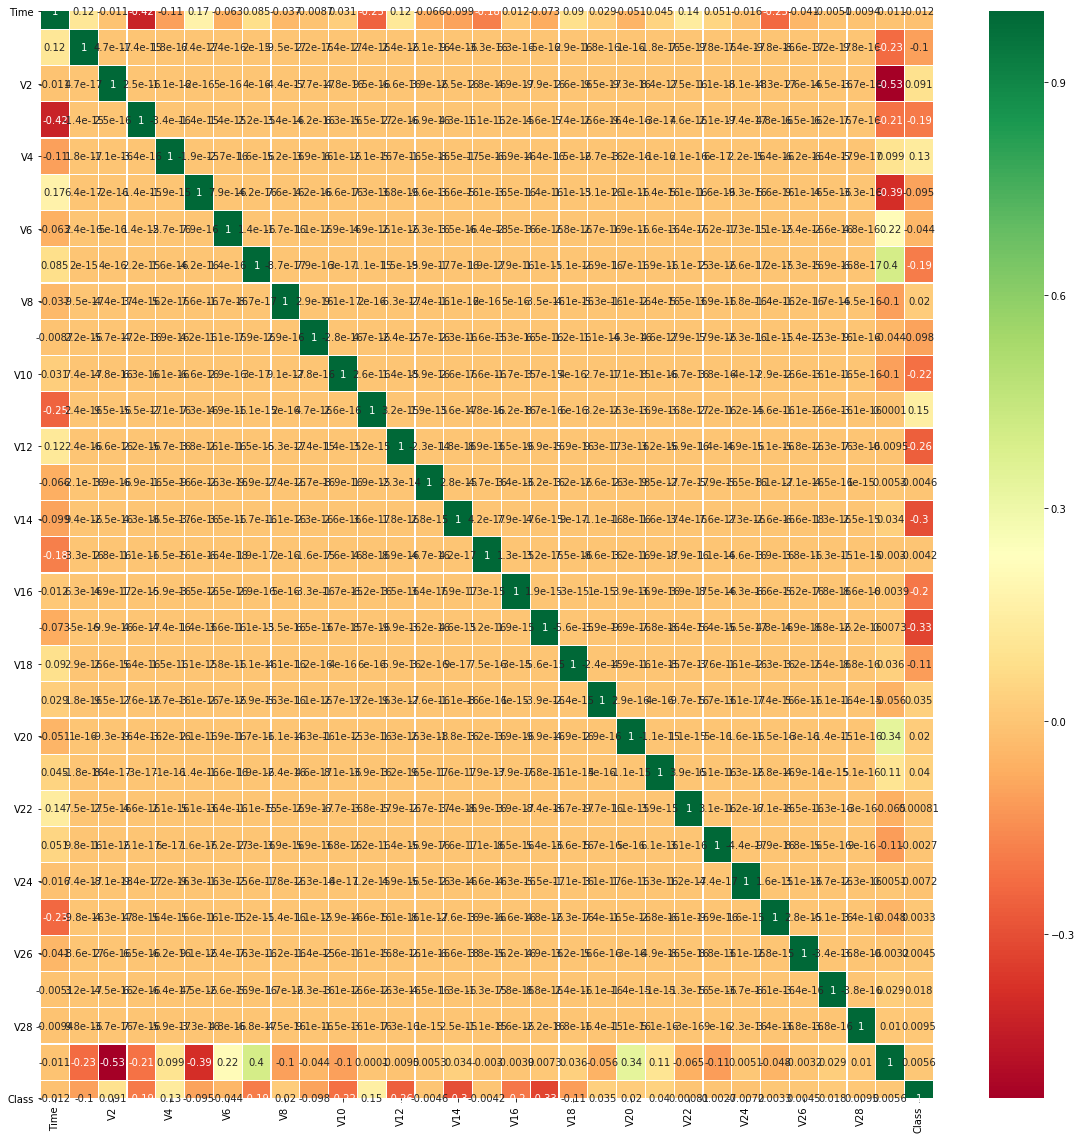

In [10]:
df_corr = dataset.corr()
sns.heatmap(df_corr, annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [11]:
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [3]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
#признаки и метки
# Формируем признаки и целевую переменную
X = dataset[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = dataset[['Class']]

In [5]:
from sklearn.model_selection import train_test_split

# Разделяем данные на данные для обучения и проверки  train_test_split 20 процентов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
#признаки
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
146929,87968.0,-0.016244,0.987380,-0.869691,-0.728449,1.122493,-0.714201,0.957031,-0.327102,0.131858,...,-0.018850,0.310536,1.051253,-0.031357,0.639605,-1.038626,0.363811,-0.212084,0.025636,4.00
56375,47394.0,-3.761589,2.082839,0.398008,2.026673,0.454698,2.190128,0.955340,0.230271,0.940548,...,1.379340,-0.552288,0.657376,-0.277879,-1.010708,-0.395303,0.041990,-0.273171,-0.693617,76.07
22660,32366.0,-1.281122,1.387225,0.982298,1.216028,0.451359,-0.360859,1.092746,-0.269205,-0.200977,...,0.059106,-0.289552,-0.394199,-0.496885,-0.078318,0.149806,-0.353089,-0.545223,-0.700844,59.90
85179,60641.0,0.919458,-0.204989,0.185916,0.859236,-0.405909,-0.769373,0.458471,-0.277126,-0.096292,...,0.206291,0.098264,0.210639,-0.157673,0.713293,0.512834,0.531561,-0.053821,0.031018,147.00
228700,145617.0,-1.586173,0.057197,0.215267,1.013724,-0.601267,0.761749,-0.591375,0.991806,-0.692027,...,0.080775,0.317763,0.869067,0.202009,-1.004876,-0.302917,1.051080,-0.016898,-0.347829,80.00


In [93]:
#метка
y_train.head()

,Class
146929,0
56375,0
22660,0
85179,0
228700,0


Модель Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

C:\ProgramData\Anaconda37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Наиболее важные атрибуты для модели Random Forest:

No handles with labels found to put in legend.


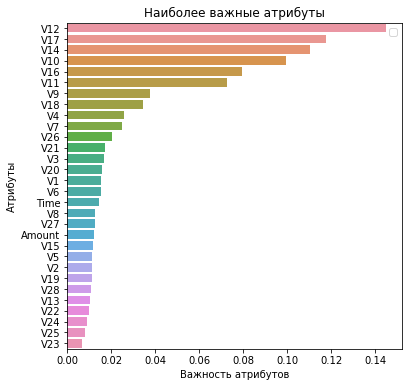

In [8]:
headers_rf = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers_rf).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Посчитаем качество модели - **classification report**:

In [10]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.96      0.76      0.85        93

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9995611109160493

Модель Random Forest "рандомных деревьев" дала точность предсказания порядка 99%.

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

Нормализуем параметры (центрируем и значения от -1 до 1)

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


При нормализации стираются названия колонок, поэтому необходимо восстановить их:

In [14]:
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [17]:
#признаки и метки
# Формируем признаки и целевую переменную
X_norm = df_norm[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y_norm = df_norm[['Class']]

In [18]:
#from sklearn.model_selection import train_test_split

# Разделяем данные на данные для обучения и проверки  train_test_split 20 процентов
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2)

In [19]:
#признаки
X_train_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
140120,-0.032918,0.960144,0.533898,0.680993,-0.513698,0.527651,-0.483853,-0.470762,0.569384,-0.053535,...,0.158311,0.119458,-0.004771,0.331868,-0.297985,0.179246,0.181982,-0.169524,-0.373915,-0.999845
137696,-0.047572,0.941778,0.510330,0.701057,-0.480218,0.517765,-0.460505,-0.476248,0.577534,-0.008061,...,0.167587,0.121337,-0.014486,0.327100,-0.293432,0.155209,0.162174,-0.169279,-0.372379,-0.982936
27201,-0.601417,0.881189,0.546759,0.728298,-0.532974,0.543545,-0.491804,-0.459143,0.569973,-0.125763,...,0.160385,0.124852,0.019041,0.323619,-0.210359,0.213999,-0.045269,-0.168345,-0.371613,-0.998911
42327,-0.524804,0.880888,0.543400,0.731090,-0.501186,0.539529,-0.484130,-0.461611,0.575959,-0.116336,...,0.157519,0.130272,0.052751,0.327070,-0.189550,0.184184,-0.306707,-0.165386,-0.370120,-0.997159
20478,-0.640388,0.865955,0.537592,0.762127,-0.396342,0.531121,-0.417639,-0.477946,0.597951,-0.033469,...,0.156118,0.120945,0.050866,0.329646,-0.510690,0.155074,-0.218592,-0.174108,-0.383648,-0.997237


In [20]:
#метка
y_train_norm.head()

,Class
140120,-1.0
137696,-1.0
27201,-1.0
42327,-1.0
20478,-1.0


Модель Random Forest

In [21]:
#from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model_norm=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_norm.fit(X_train_norm,y_train_norm)

C:\ProgramData\Anaconda37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Посчитаем качество модели на нормализованных данных - **classification report**:

In [22]:
#from sklearn.metrics import classification_report

model_norm_pred = model_norm.predict(X_test_norm)

print(classification_report(y_test_norm, model_norm_pred))

model_norm.score(X_test_norm, y_test_norm)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56844
         1.0       0.91      0.72      0.81       118

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



0.9992802219023208

Модель Random Forest "рандомных деревьев" на нормализованых данных дала точность предсказания порядка 99%, такую же как и на ненормализованных. Для этой модели данные можно не нормализовывать.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

Методы работы с несбалансированными данными - **up-sampling**

In [24]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda37

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages wil



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda37




In [23]:
!pip install -U imbalanced-learn

  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda37\\lib\\site-packages\\scikit_learn-0.21.3.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



Увеличим количество элементов в таблице для уравновешивания классов.

In [25]:
#from sklearn.model_selection import train_test_split

#Создадим тренировочный и тестовый датасет из исходных данных
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(df_norm,
                                                         y,
                                                         test_size = 0.3,#%70 train, 30% test
                                                         random_state = 3)

Увеличим количество тренировочных данных (тестовые данные остаются нетронутыми)

In [26]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train_s, y_train_s)
X_resampled, y_resampled = ros.fit_sample(X_train_s, y_train_s)
print('Количество элементов до операции:', len(X_train_s))
print('Количество элементов после операции:', len(X_resampled))

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
#Мы увеличили количество элементов, и уравняли классы по количеству
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

In [ ]:
#Но в тестовых данных остается несбалансированность.
unique, counts = np.unique(y_test_s, return_counts=True)
dict(zip(unique, counts))